In [3]:
from data_helper import *

In [4]:
all_file = 'data/msdialog/all.tsv'

In [5]:
conn_title = connect_db()
conn_utter = connect_db()

sql_title = 'select dialog_id from titles_final'
sql_utter = 'select utterance, tags, user_or_agent from contents_final where dialog_id="{0}"'

with conn_title.cursor() as cursor_title, conn_utter.cursor() as cursor_utter, open(all_file, 'w') as fout:
    cursor_title.execute(sql_title)
    count = 0
    while True:
        count += 1
        row_title = cursor_title.fetchone()
        if row_title == None:
            break
        dialog_id = row_title['dialog_id']

        cursor_utter.execute(sql_utter.format(dialog_id))
        contents = cursor_utter.fetchall()

        label_strs = [content['tags'].strip() for content in contents]
        utterances = list(map(clean_str, [content['utterance'] for content in contents]))
        uoas = [content['user_or_agent'].strip() for content in contents]
        
        targets = []
        for label_str in label_strs:
            labels = label_str.split()
            label = '_'.join(sorted(labels))
            targets.append(label)
        
        for utterance, target, uoa in zip(utterances, targets, uoas):
            fout.write('{}\t{}\t{}\n'.format(target, utterance, uoa))
#             fout.write('O\t__eot__\n')
#         fout.write('O\t__eod__\n\n')
        fout.write('\n')

In [ ]:
# get label combo distribution

In [3]:
combo_dict = {}
with open(all_file) as fin:
    for line in fin:
        if line != '\n':
            tokens = line.strip().split('\t')
            labels = tokens[0]
            
            labels = labels.split('_')
            if len(labels) > 1 and 'GG' in labels:
                labels.remove('GG')
            if len(labels) > 1 and 'O' in labels:
                labels.remove('O')
            if len(labels) > 1 and 'JK' in labels:
                labels.remove('JK')
            
            labels = '_'.join(sorted(labels))
            
            combo_dict[labels] = combo_dict.setdefault(labels, 0) + 1

In [8]:
print(len(combo_dict))
print(sum(combo_dict.values()))

152
10027


In [17]:
sorted_combos = sorted(combo_dict.items(), key=lambda x: x[1], reverse=True)
print(sum([item[1] for item in sorted_combos[:32]]) / sum(combo_dict.values()))

sorted_combos[:32]

0.9033609255011469


[('PA', 2482),
 ('OQ', 1868),
 ('PF', 559),
 ('FD_PA', 524),
 ('FD', 500),
 ('IR_PA', 372),
 ('GG', 346),
 ('FD_PF', 207),
 ('FD_NF', 198),
 ('FD_OQ', 169),
 ('IR', 165),
 ('RQ', 154),
 ('NF', 140),
 ('FD_FQ', 137),
 ('CQ_FD', 116),
 ('FQ', 101),
 ('PA_PF', 98),
 ('JK', 92),
 ('FD_RQ', 87),
 ('CQ_IR', 81),
 ('CQ_IR_PA', 77),
 ('FQ_RQ', 71),
 ('CQ_PA', 62),
 ('FQ_IR', 58),
 ('CQ_FQ', 55),
 ('FD_IR', 54),
 ('NF_OQ', 53),
 ('FD_IR_PA', 49),
 ('OQ_RQ', 49),
 ('IR_OQ', 48),
 ('FD_FQ_NF', 44),
 ('CQ', 42)]

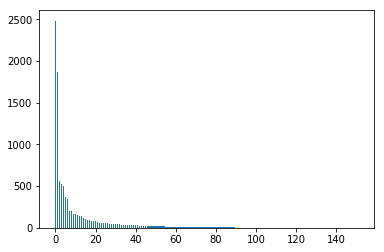

In [7]:
import matplotlib.pyplot as plt

plt.bar(range(len(sorted_combos)), [item[1] for item in sorted_combos], align='center')
# plt.xticks(range(len(D)), list(D.keys()))
# plt.xlim(0, 20)

plt.show()

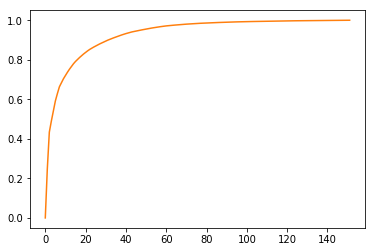

In [30]:
import matplotlib.pyplot as plt

sorted_combo_incre = []
for i in range(len(sorted_combos)):
    sorted_combo_incre.append(sum([item[1] for item in sorted_combos[:i]]) / 10027)

plt.plot(range(len(sorted_combos)), sorted_combo_incre)
plt.show()